In [1]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

HHE_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'HHE':
        HHE_st.append(st[i]) 

In [2]:
HHE_st

34 Trace(s) in Stream:

CN.BELQ..HHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
...
(32 other traces)
...
CN.DMCQ..HHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [3]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


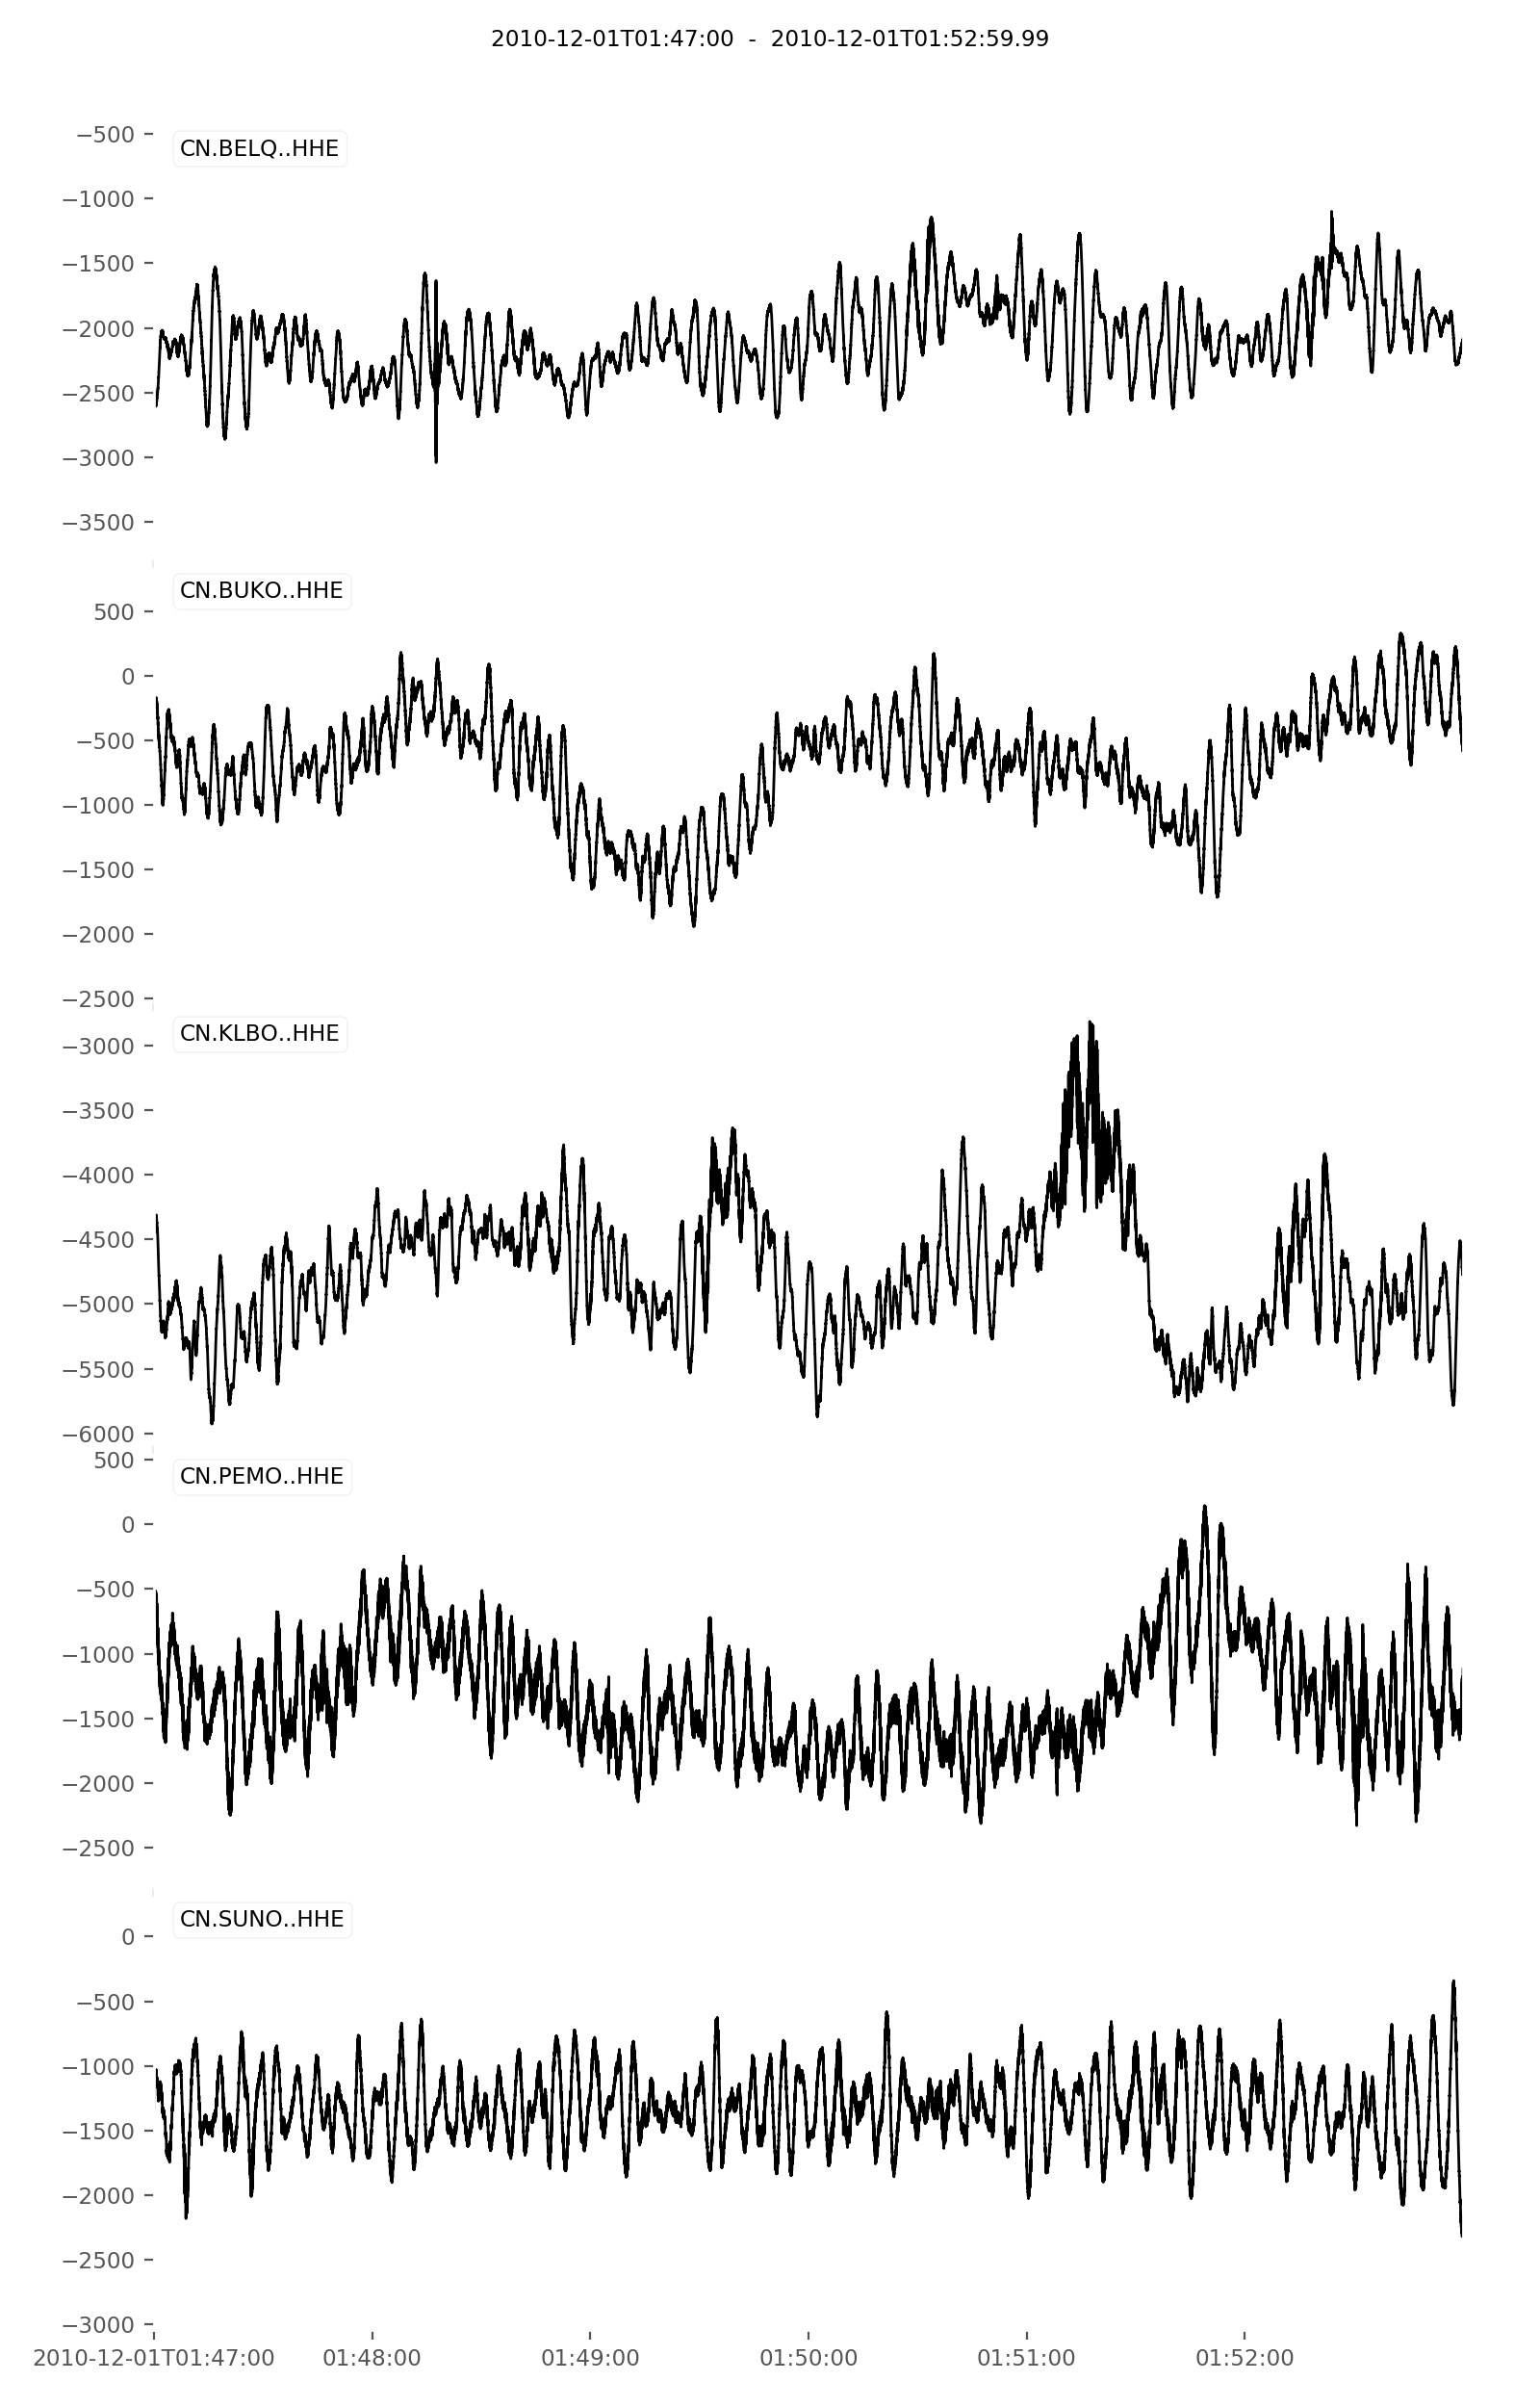

In [4]:
HHE_st[:5].plot()

In [5]:
print("Station: ", [tr.stats['station'] for tr in HHE_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in HHE_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in HHE_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in HHE_st]))

Station:  ['BELQ', 'BUKO', 'KLBO', 'SUNO', 'PEMO', 'BANO', 'KILO', 'PLVO', 'TOBO', 'CLWO', 'DELO', 'BMRO', 'PKRO', 'ORIO', 'WLVO', 'DRWO', 'DREO', 'LSQQ', 'BWLO', 'BRCO', 'TORO', 'ALFO', 'PECO', 'ACTO', 'BASO', 'MATQ', 'MALO', 'STCO', 'TYNO', 'ELFO', 'LATQ', 'CHGQ', 'PNPO', 'DMCQ']
Sampling Rate:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
(delta, npts):  [(0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 360

In [6]:
HHE_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in HHE_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in HHE_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
-2087.15691667 		 301.23777562 		 (-3043, -1098)
-685.038111111 		 414.543749792 		 (-1942, 331)
-4768.58397222 		 496.516387728 		 (-5929, -2813)
-1321.08922222 		 276.740797068 		 (-2321, -340)
-1337.41983333 		 413.664407012 		 (-2330, 145)
-5454.42441667 		 947.135883281 		 (-7624, -3424)
-2511.63805556 		 1311.73446966 		 (-6234, 271)
-2840.40722222 		 572.80660645 		 (-4572, -1036)
-2230.88002778 		 808.66396487 		 (-4135, 285)
-3833.88025 		 998.528095759 		 (-12728, 4205)
-2534.6875 		 261.917337276 		 (-3239, -1603)
1914.10369444 		 258.731004343 		 (1103, 2843)
-210.438611111 		 167.661227573 		 (-1401, 1073)
-930.242027778 		 1774.66536505 		 (-7050, 2249)
111.110666667 		 143.233407911 		 (-398, 683)
-1856.11430556 		 1351.87936549 		 (-6254, 2214)
-5483.60902778 		 2776.37974355 		 (-15225, 5311)
-1119.01958333 		 851.111999112 		 (-7092, 6242)
763.347638889 		 334.636524883 		 (-311, 1612)
31.4832222222 		 494.5128963 		 (-1865, 1551)
-19

Using the same method we did for HHN data, we will split these up into those that are normalized around 0 with those that are not.

In [10]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in HHE_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)
print(len(around0))
print(len(notaround0))

10
24


<IPython.core.display.Javascript object>


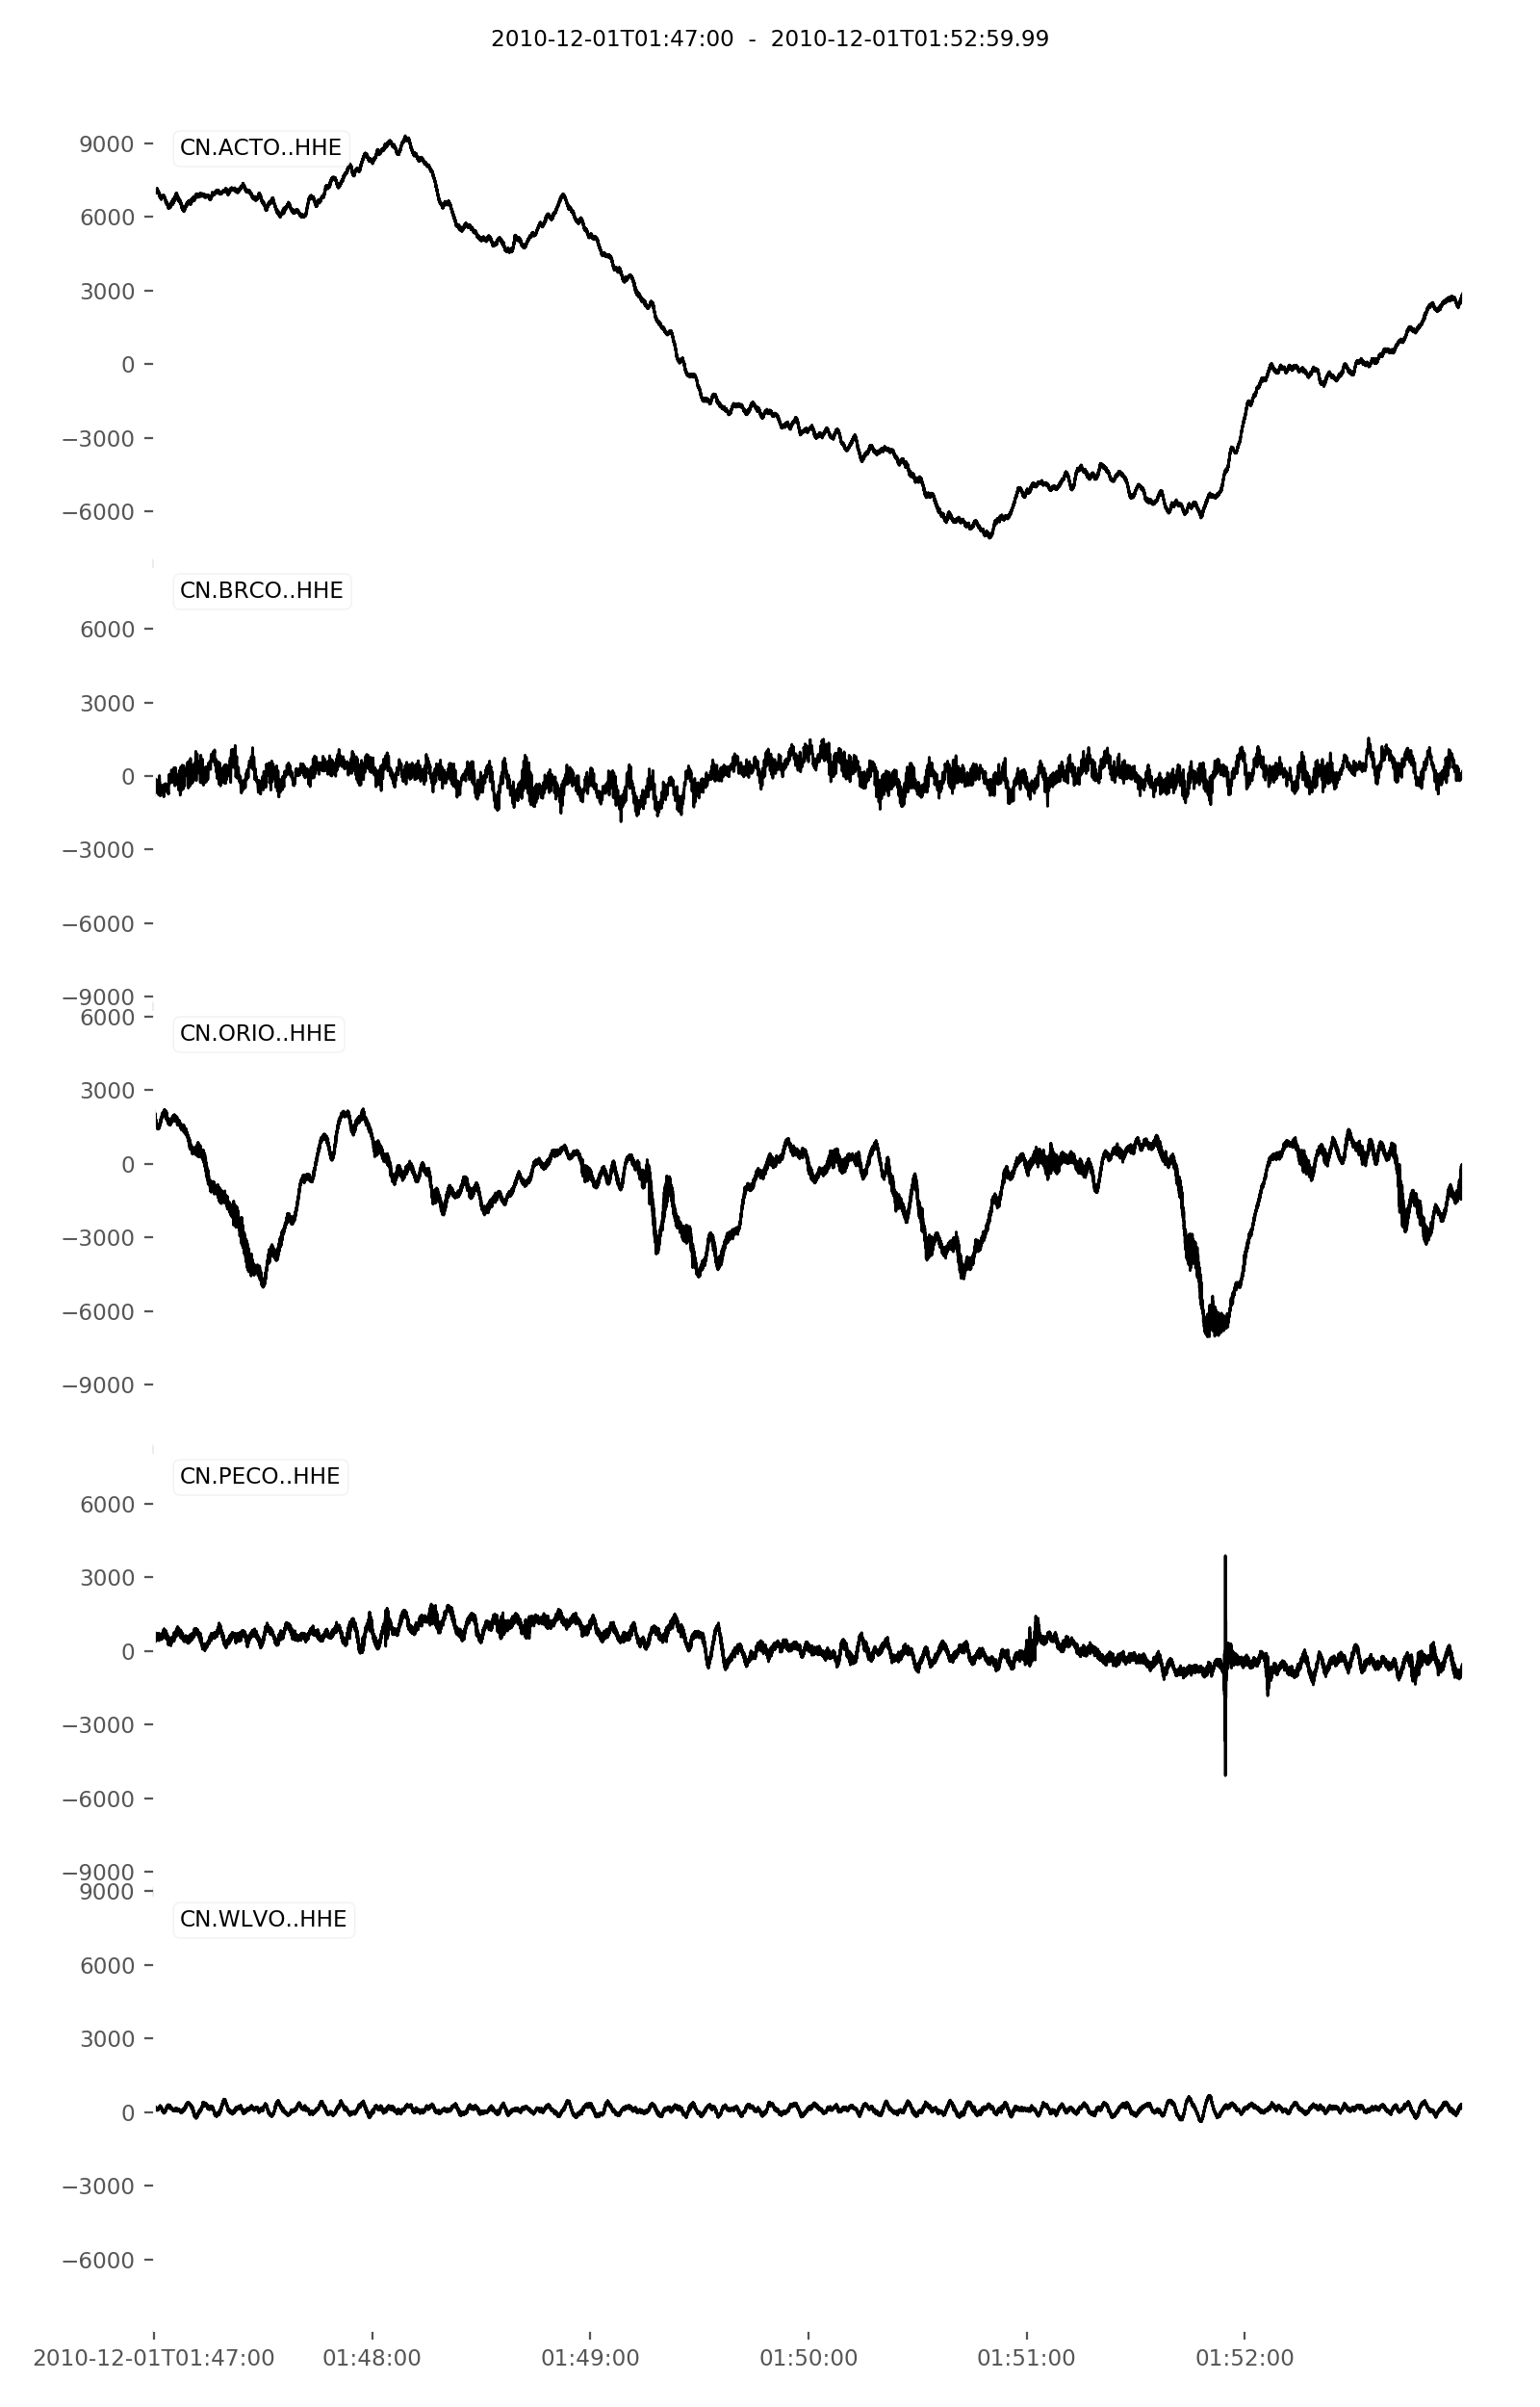

In [8]:
around0[:5].plot()

<IPython.core.display.Javascript object>


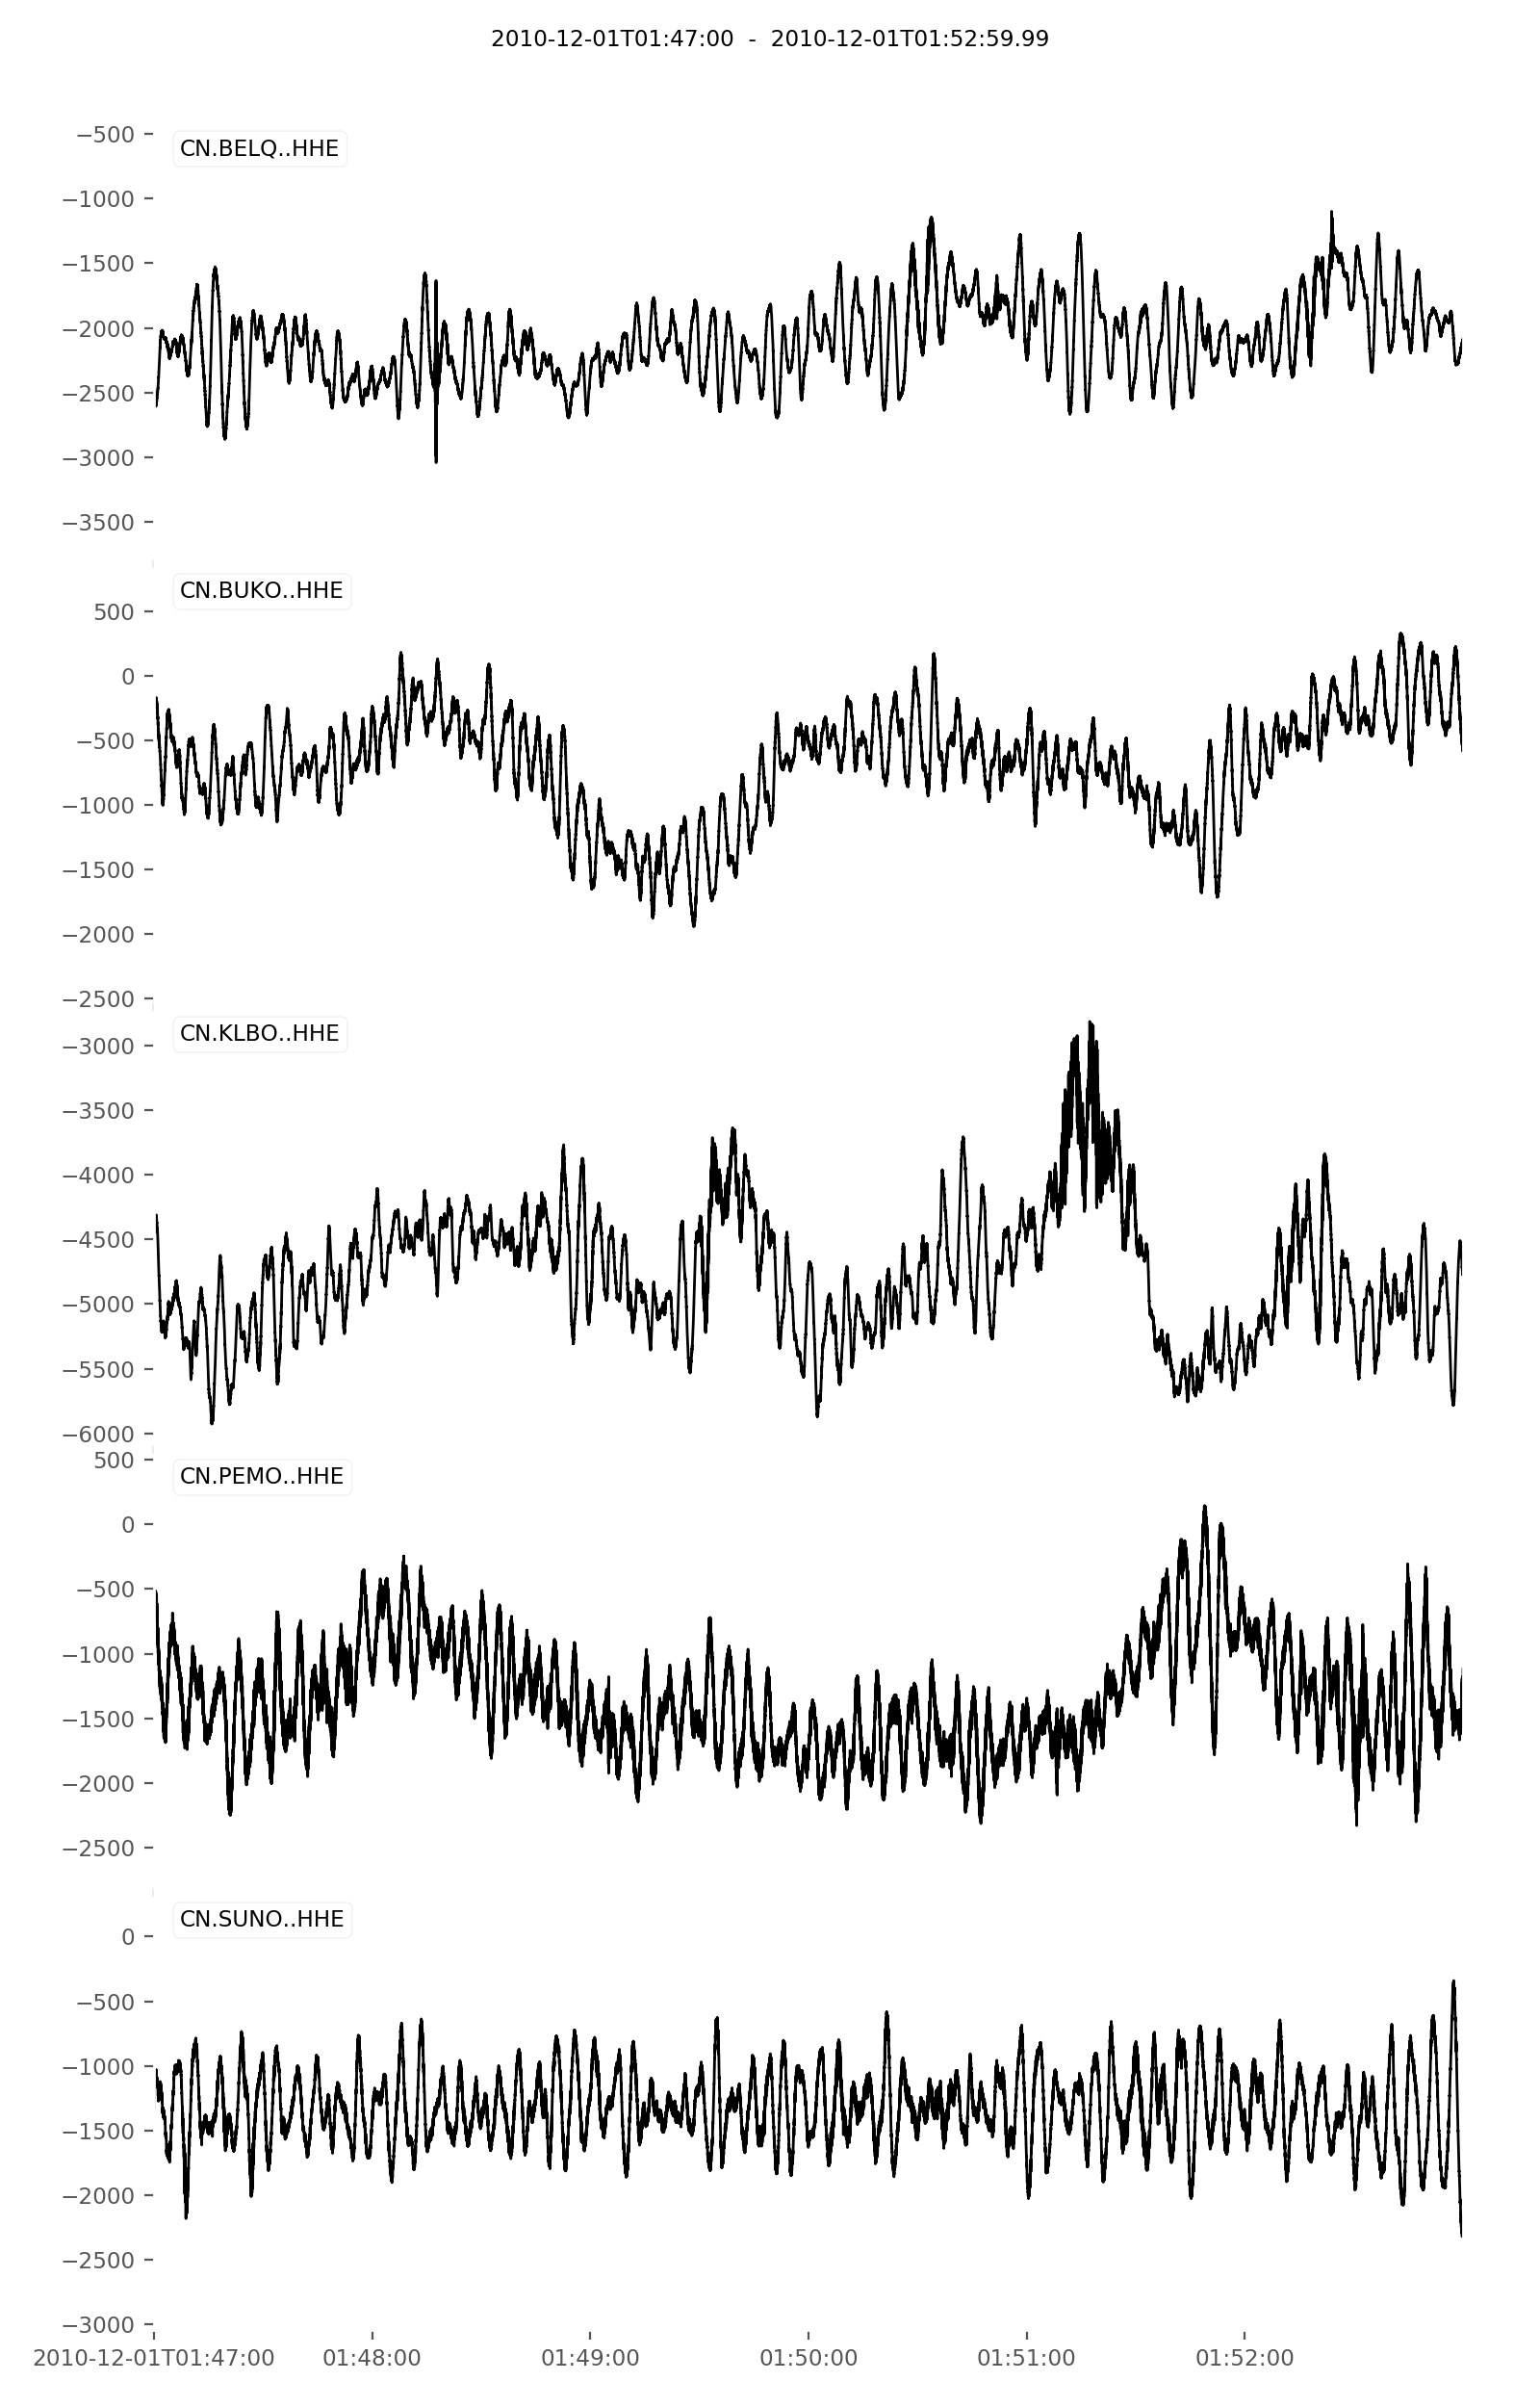

In [11]:
notaround0[:5].plot()